# Personalized PageRank While the use of PageRank has proven very eﬀective, the web’s rapid growth in size and diversity drives an increasing demand for greater ﬂexibility in ranking. Ideally, each user should be able to deﬁne their own notion of importance for each individual query.

# Question 4.a
 Suppose you have your own notion of importance. Your interest in a node is proportional to the node’s PageRank, because you totally rely upon Google to decide which website to visit (assume that these nodes represent websites). Again, use random walk on network generated in question 3 to simulate this personalized PageRank. Here the teleportation probability to each node is proportional to its PageRank (as opposed to the regular PageRank, where at teleportation, the chance of visiting all nodes are the same and equal to 1 N ). Again, let the teleportation probability be equal to α = 0.15. Compare the results with 3(a). 

In [7]:
library('igraph')
library('Matrix')
library('pracma')

In [8]:
#create directed random network with 1000 nodes using preferential attachment model
# with m=4
n=1000
g=barabasi.game(n=n,m=4,directed=TRUE)
g_org=barabasi.game(n=n,m=4, directed=TRUE)
#generate a index list of all nodes
vertice_list=seq(1,n)
#generate a new index of a permutated vertices id, use sample to shuffle vertices id
g_per=permute(g,sample(n))
#obtain edge list of original graph, the returned object is a matrix
#where each row has two element indicated the start node and end node
edge_list=t(as_edgelist(g_per))
#combine two graphs together according to edge information
g_combine=add_edges(g_org,edge_list)

In [9]:
#define helper function to extract transition matrix
transition_mat=function(g){
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)

}

#define helper function to do random walk task
random_walk_tele=function(g,step_max,start_node,transition_matrix=NULL,tele_prob=NULL){
    if (is.null(transition_matrix)){
        transition_matrix=transition_mat(g)
    }
    if (is.null(tele_prob)){
        tele_prob=rep(1/vcount(g),vcount(g))
    }
    v=start_node
    end_list=vector(mode='numeric',length=step_max)
    for (i in 1:step_max){
        prob=transition_matrix[v,]
        v_org=sample(1:vcount(g),1,prob=prob)
        v_tele=sample(1:vcount(g),1,prob=tele_prob)
        seed=sample(1:100,1)
        if(seed<=15 || degree(g,v,mode='out')==0){
            v=v_tele
        }else{
            v=v_org
        }
        end_list[i]=v
    }
    return (end_list)
}

#define helper function to do random walk task
random_walk=function(g,step_max,start_node,transition_matrix=NULL){
    if (is.null(transition_matrix)){
        transition_matrix=transition_mat(g)
    }
    v=start_node
    end_list=vector(mode='numeric',length=step_max)
    for (i in 1:step_max){
        prob=transition_matrix[v,]
        v=sample(1:vcount(g),1,prob=prob)
        #redefine start node
        end_list[i]=v
    }
    return (end_list)
}


In [10]:
#get page bank without tele
transition_matrix=transition_mat(g_combine)
iteration=1000
step_max=100
page_bank_raw=vector(mode='numeric',length=vcount(g_combine))
for (i in 1:iteration){
    #randomly choose a start node
    start_node=sample(1:vcount(g_combine),1)
    #process random walk function and save end point
    end_list=random_walk(g_combine,step_max,start_node,transition_matrix)
    #count of the visitation of node + 1 
    for (i in end_list){
    page_bank_raw[i]=page_bank_raw[i]+1
            }
    
}

In [11]:
#extract degree of nodes
degree=degree(g_combine)
#measure the probability that the walker visits each node
transition_matrix=transition_mat(g_combine)
iteration=1000
step_max=100
page_bank=vector(mode='numeric',length=vcount(g_combine))
for (i in 1:iteration){
    #randomly choose a start node
    start_node=sample(1:vcount(g_combine),1)
    #process random walk function and save end point
    end_list=random_walk_tele(g_combine,step_max,start_node,transition_matrix,page_bank_raw)
    #count of the visitation of node + 1 
    for (i in end_list){
    page_bank[i]=page_bank[i]+1
            }
    
}



Call:
lm(formula = page_bank_prob ~ degree)

Coefficients:
(Intercept)       degree  
  -0.001681     0.000168  



[1] 0.8921058

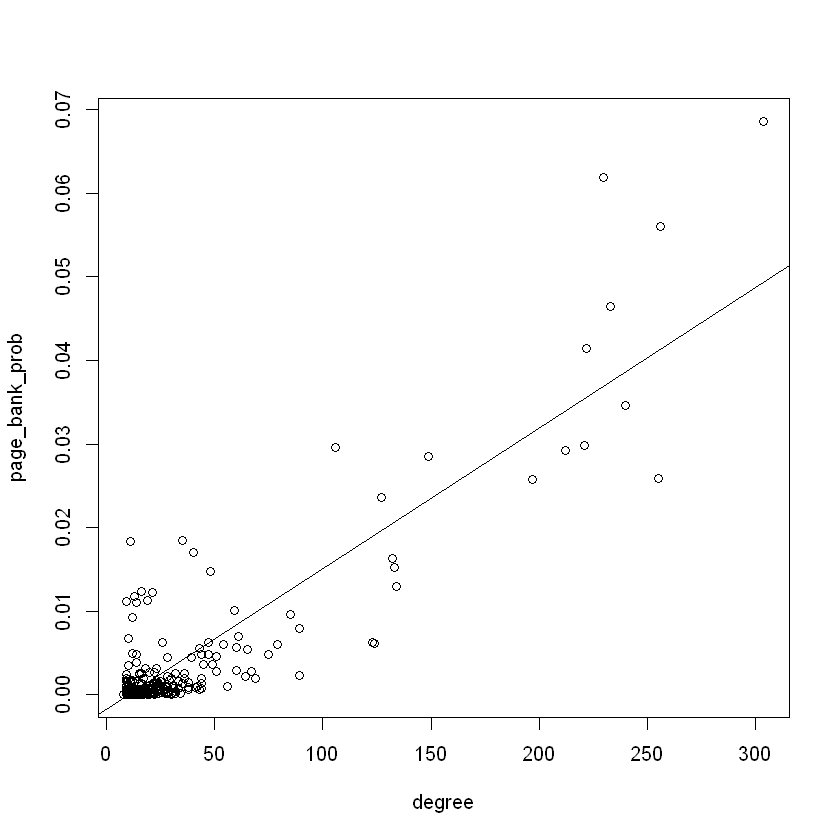

In [12]:
page_bank_prob=page_bank/(iteration*step_max)
#Fit a linear model
model=lm(page_bank_prob~degree)
plot(degree,page_bank_prob,abline(model))
print(model)
cor(degree,page_bank_prob,method=c('pearson'))

# Question 4.b
Find two nodes in the network with median PageRanks. Repeat part 4(a) if teleportations land only on those two nodes (with probabilities 1/2, 1/2). How are the PageRank values aﬀected?

In [13]:
#extract index with increasing degree
index=sort(page_bank_raw,index.return=T)[2]$ix
#extract median degree nodes
median1=index[iteration/2]
median2=index[iteration/2+1]
#generate empty teleportation vector
prob_tele_med=rep(0,1000)
#assign 0.5 to two median nodes
prob_tele_med[median1]=1/2
prob_tele_med[median2]=1/2



In [14]:
#extract degree of nodes
degree=degree(g_combine)
#measure the probability that the walker visits each node
transition_matrix=transition_mat(g_combine)
iteration=1000
step_max=100
#define new pagebank
page_bank_4b=vector(mode='numeric',length=vcount(g_combine))
for (i in 1:iteration){
    #randomly choose a start node
    start_node=sample(1:vcount(g_combine),1)
    #process random walk function and save end point
    end_list=random_walk_tele(g_combine,step_max,start_node,transition_matrix,prob_tele_med
                             
                             )
    #count of the visitation of node + 1 
    for (i in end_list){
    page_bank_4b[i]=page_bank_4b[i]+1
            }
    
}


Call:
lm(formula = page_bank_prob ~ degree)

Coefficients:
(Intercept)       degree  
  -0.001666     0.000167  



[1] 0.8949308

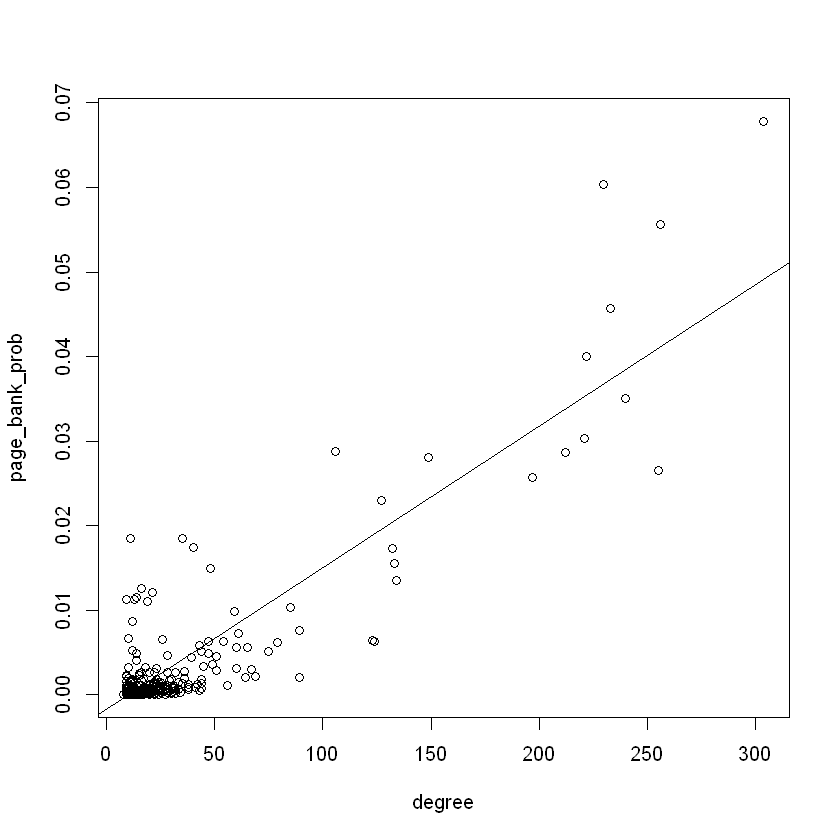

In [15]:
page_bank_prob=page_bank_raw/(iteration*step_max)
#Fit a linear model
model=lm(page_bank_prob~degree)
plot(degree,page_bank_prob,abline(model))
print(model)
cor(degree,page_bank_prob,method=c('pearson'))


Call:
lm(formula = page_bank_prob ~ degree)

Coefficients:
(Intercept)       degree  
 -0.0012224    0.0001392  



[1] 0.699401

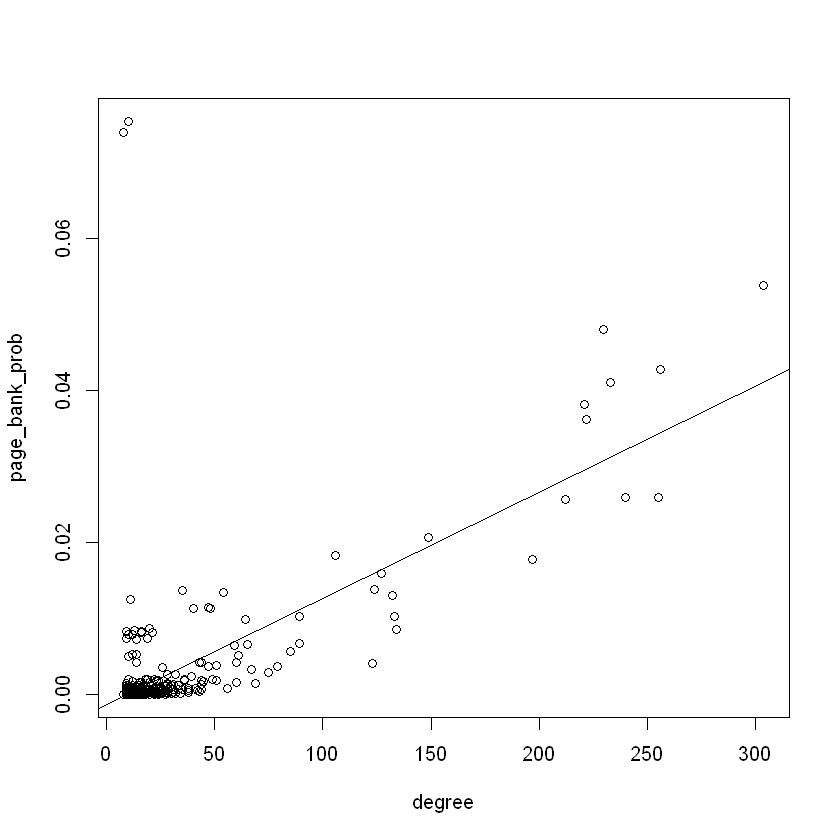

In [16]:
page_bank_prob=page_bank_4b/(iteration*step_max)
#Fit a linear model
model=lm(page_bank_prob~degree)
plot(degree,page_bank_prob,abline(model))
print(model)
cor(degree,page_bank_prob,method=c('pearson'))

# Question 4.c
More or less, 4(b) is what happens in the real world, in that a user browsing the web only teleports to a set of trusted web pages. However, this is against the assumption of normal PageRank, where we assume that people’s interest in all nodes are the same. Can you take into account the eﬀect of this self-reinforcement and adjust the PageRank equation